# English Wikipedia page views 2007 - 2018

In [1]:
import pandas as pd
import numpy as np
import json
import requests

### Step 1: Data acquisition

Data acquisition defines api call endpoints and api parameters in order to pull pagecount and pageview information from english wikipedia api.

In [2]:
# define both endpoints with parameters to be set below
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# parameters for getting aggregated legacy view data by desktop and mobile access site
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
params_pagecounts_desktop = {"project" : "en.wikipedia.org",
                             "access-site" : "desktop-site",
                             "granularity" : "monthly",
                             "start" : "2007120100",
                             # for end use 1st day of month following final month of data
                             "end" : "2016080100"
                            }

params_pagecounts_mobile = {"project" : "en.wikipedia.org",
                            "access-site" : "mobile-site",
                            "granularity" : "monthly",
                            "start" : "2007120100",
                            # for end use 1st day of month following final month of data
                            "end" : "2016080100"
                            }

# parameters for getting aggregated current standard pageview data by desktop, mobile web and mobile app
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
params_pageviews_desktop = {"project" : "en.wikipedia.org",
                            "access" : "desktop",
                            "agent" : "user",
                            "granularity" : "monthly",
                            "start" : "2015070100",
                            # for end use 1st day of month following final month of data
                            "end" : '2018101000'
                            }

params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                               "access" : "mobile-web",
                               "agent" : "user",
                               "granularity" : "monthly",
                               "start" : "2015070100",
                               # for end use 1st day of month following final month of data
                               "end" : '2018101000'
                               }

params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                               "access" : "mobile-app",
                               "agent" : "user",
                               "granularity" : "monthly",
                               "start" : "2015070100",
                               # for end use 1st day of month following final month of data
                               "end" : '2018101000'
                               }

# Requester Information
headers = {
    'User-Agent': 'https://github.com/yd4wh',
    'From': 'yd4wh@uw.edu'
}

Define a function that takes in endpoint and parameter information and save data into json files accordingly.

In [4]:
# function that takes endpoint and parameters to get data through api call
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [5]:
# use above defined function to make api calls for legacy and current pageview data
monthly_pagecounts_desktop = api_call(endpoint_legacy, params_pagecounts_desktop)
monthly_pagecounts_mobile = api_call(endpoint_legacy, params_pagecounts_mobile)
monthly_pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)
monthly_pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)
monthly_pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

Write all saved json files as intermediate output for reproducible results.

In [6]:
# write all json files out as source data file
with open('pagecounts_desktop-site_200712-201607.json','w') as output:
    json.dump(monthly_pagecounts_desktop, output)
with open('pagecounts_mobile-site_201410-201607.json','w') as output:
    json.dump(monthly_pagecounts_mobile, output)
with open('pageviews_desktop_201507-201809.json','w') as output:
    json.dump(monthly_pageviews_desktop, output)
with open('pageviews_mobile-web_201507-201809.json','w') as output:
    json.dump(monthly_pageviews_mobile_web, output)
with open('pageviews_mobile-app_201507-201809.json','w') as output:
    json.dump(monthly_pageviews_mobile_app, output)

### Step 2: Data processing

Convert all saved json files into dataframes for easier data processing in python.

In [7]:
# convert all json files into dataframes for processing
df_monthly_pagecounts_desktop = pd.DataFrame.from_dict(monthly_pagecounts_desktop['items'])
df_monthly_pagecounts_mobile = pd.DataFrame.from_dict(monthly_pagecounts_mobile['items'])
df_monthly_pageviews_desktop = pd.DataFrame.from_dict(monthly_pageviews_desktop['items'])
df_monthly_pageviews_mobile_web = pd.DataFrame.from_dict(monthly_pageviews_mobile_web['items'])
df_monthly_pageviews_mobile_app = pd.DataFrame.from_dict(monthly_pageviews_mobile_app['items'])

In [8]:
# make deep copy of mobile app as base df for combined pageviews mobile
df_monthly_pageviews_mobile = df_monthly_pageviews_mobile_app.copy(deep=True)

Combine pageviews from mobile app and mobile web into pageviews mobile for cleaner representation later.

In [9]:
# combine pageviews for mobile app and mobile web
df_monthly_pageviews_mobile['pageview_mobile_views'] = df_monthly_pageviews_mobile_app['views'] + df_monthly_pageviews_mobile_web['views']
# change access to just mobile for clarity
df_monthly_pageviews_mobile['access'] = 'mobile'
# clean dataframe for combined data to just keep mobile combined views
df_monthly_pageviews_mobile = df_monthly_pageviews_mobile[['access',
                                                           'agent',
                                                           'granularity',
                                                           'project',
                                                           'timestamp',
                                                           'pageview_mobile_views']]

In [10]:
# get intermediate view of pageviews mobile with combined views
df_monthly_pageviews_mobile

,access,agent,granularity,project,timestamp,pageview_mobile_views
0,mobile,user,monthly,en.wikipedia,2015070100,3288755294
1,mobile,user,monthly,en.wikipedia,2015080100,3302333038
2,mobile,user,monthly,en.wikipedia,2015090100,3170203333
3,mobile,user,monthly,en.wikipedia,2015100100,3268499132
4,mobile,user,monthly,en.wikipedia,2015110100,3236601070
5,mobile,user,monthly,en.wikipedia,2015120100,3376275307
6,mobile,user,monthly,en.wikipedia,2016010100,3717836846
7,mobile,user,monthly,en.wikipedia,2016020100,3334862272
8,mobile,user,monthly,en.wikipedia,2016030100,3386684191
9,mobile,user,monthly,en.wikipedia,2016040100,3258764002


Combine desktop and mobile views to produce all views for representation.

In [11]:
# make two deep copy of pagescounts and pageviews as base df for pagecount and pageview all_views
df_pagecount_all_views = df_monthly_pagecounts_desktop.copy(deep=True)
df_pageview_all_views = df_monthly_pageviews_desktop.copy(deep=True)

In [12]:
# combine pagecount for desktop and mobile
df_pagecount_all_views = df_monthly_pagecounts_desktop.merge(df_monthly_pagecounts_mobile,
                                                             how='left', left_on='timestamp', right_on='timestamp')
# change all NaN values to 0 for calculation
df_pagecount_all_views = df_pagecount_all_views.fillna(0)
# change access-site to all_views
df_pagecount_all_views['access'] = 'all_views'
# add count_x to count_y to get all views
df_pagecount_all_views['pagecount_all_views'] = df_pagecount_all_views['count_x']+df_pagecount_all_views['count_y']
# clean dataframe for combined data to just keep all views
df_pagecount_all_views = df_pagecount_all_views[['access',
                                                 'granularity_x',
                                                 'project_x',
                                                 'timestamp',
                                                 'pagecount_all_views']]

In [13]:
# get intermediate view of pagecount all views
df_pagecount_all_views

,access,granularity_x,project_x,timestamp,pagecount_all_views
0,all_views,monthly,en.wikipedia,2007120100,2.998332e+09
1,all_views,monthly,en.wikipedia,2008010100,4.930903e+09
2,all_views,monthly,en.wikipedia,2008020100,4.818394e+09
3,all_views,monthly,en.wikipedia,2008030100,4.955406e+09
4,all_views,monthly,en.wikipedia,2008040100,5.159162e+09
5,all_views,monthly,en.wikipedia,2008050100,5.584691e+09
6,all_views,monthly,en.wikipedia,2008060100,5.712104e+09
7,all_views,monthly,en.wikipedia,2008070100,5.306303e+09
8,all_views,monthly,en.wikipedia,2008080100,5.140156e+09
9,all_views,monthly,en.wikipedia,2008090100,5.479534e+09


In [14]:
# combine pageviews for desktop and mobile
df_pageview_all_views['pageview_all_views'] = df_monthly_pageviews_desktop['views'] + df_monthly_pageviews_mobile['pageview_mobile_views']
# change access to just mobile for clarity
df_pageview_all_views['access'] = 'all_views'
# clean dataframe for combined data to just keep mobile combined views
df_pageview_all_views = df_pageview_all_views[['access',
                                               'granularity',
                                               'project',
                                               'timestamp',
                                               'pageview_all_views']]

In [15]:
# get intermediate view of pageview all views
df_pageview_all_views

,access,granularity,project,timestamp,pageview_all_views
0,all_views,monthly,en.wikipedia,2015070100,7665421980
1,all_views,monthly,en.wikipedia,2015080100,7634815221
2,all_views,monthly,en.wikipedia,2015090100,7655695037
3,all_views,monthly,en.wikipedia,2015100100,7746031887
4,all_views,monthly,en.wikipedia,2015110100,7524321290
5,all_views,monthly,en.wikipedia,2015120100,7476287344
6,all_views,monthly,en.wikipedia,2016010100,8154016303
7,all_views,monthly,en.wikipedia,2016020100,7585859457
8,all_views,monthly,en.wikipedia,2016030100,7673274617
9,all_views,monthly,en.wikipedia,2016040100,7408147859


Rename all views columns for combining data and keep only neccesary rows without duplicate columns.

In [16]:
# rename other dataframes views/counts column before merging
df_monthly_pagecounts_desktop.rename(columns={'count':'pagecount_desktop_views'}, inplace=True)
df_monthly_pagecounts_mobile.rename(columns={'count':'pagecount_mobile_views'}, inplace=True)
df_monthly_pageviews_desktop.rename(columns={'views':'pageview_desktop_views'}, inplace=True)

In [17]:
# import function tools for merging all df
from functools import reduce

In [18]:
# define all dfs to be merged
df_to_combine = [df_pagecount_all_views,
                 df_monthly_pagecounts_desktop,
                 df_monthly_pagecounts_mobile,
                 df_pageview_all_views,
                 df_monthly_pageviews_desktop,
                 df_monthly_pageviews_mobile]
# merge all dataframes
df_all_view_combined = reduce(lambda  left,right: pd.merge(left,right,on=['timestamp'],
                                                           how='outer'), df_to_combine).fillna(0)

In [19]:
# keep only columns needed
df_all_view_combined = df_all_view_combined[['timestamp',
                                             'pagecount_all_views',
                                             'pagecount_desktop_views',
                                             'pagecount_mobile_views',
                                             'pageview_all_views',
                                             'pageview_desktop_views',
                                             'pageview_mobile_views']]

In [20]:
# preview intermediate result
df_all_view_combined

,timestamp,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007120100,2.998332e+09,2.998332e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2008010100,4.930903e+09,4.930903e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2008020100,4.818394e+09,4.818394e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2008030100,4.955406e+09,4.955406e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2008040100,5.159162e+09,5.159162e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2008050100,5.584691e+09,5.584691e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,2008060100,5.712104e+09,5.712104e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,2008070100,5.306303e+09,5.306303e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,2008080100,5.140156e+09,5.140156e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,2008090100,5.479534e+09,5.479534e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Clean timestamp into year and month separate representations.

In [21]:
# clean out year and month values
df_all_view_combined['year'] = df_all_view_combined['timestamp'].astype(str).str[:4]
df_all_view_combined['month'] = df_all_view_combined['timestamp'].astype(str).str[4:6]

In [22]:
# keep only useful columns
df_all_view_combined = df_all_view_combined[['year',
                                             'month',
                                             'pagecount_all_views',
                                             'pagecount_desktop_views',
                                             'pagecount_mobile_views',
                                             'pageview_all_views',
                                             'pageview_desktop_views',
                                             'pageview_mobile_views']]

Check intermediate output and write it into csv file.

In [23]:
# output intermediate result
df_all_view_combined

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2.998332e+09,2.998332e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2008,01,4.930903e+09,4.930903e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2008,02,4.818394e+09,4.818394e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2008,03,4.955406e+09,4.955406e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2008,04,5.159162e+09,5.159162e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2008,05,5.584691e+09,5.584691e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,2008,06,5.712104e+09,5.712104e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,2008,07,5.306303e+09,5.306303e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,2008,08,5.140156e+09,5.140156e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,2008,09,5.479534e+09,5.479534e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [24]:
df_all_view_combined.to_csv('en-wikipedia_traffic_200712-201809.csv', index=False)

### Step 3: Analysis

In [25]:
import matplotlib.pyplot as plt

In [73]:
# create a deep copy for graph
combined_to_graph = df_all_view_combined.copy(deep=True)

Cleaning the dataframe for graphing purposes. We need to change zeros into NaN so that invalid pageviews won't be graphed. We also need to add in day column for datetime graphing, we chose 1 for day as the starting date of the month for consistency.

In [74]:
# replace zeros with NaN for graphing
combined_to_graph[combined_to_graph == 0] = np.nan
# add day column for graphing
combined_to_graph['day'] = 1
combined_to_graph

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views,day
0,2007,12,2.998332e+09,2.998332e+09,NaN,NaN,NaN,NaN,1
1,2008,01,4.930903e+09,4.930903e+09,NaN,NaN,NaN,NaN,1
2,2008,02,4.818394e+09,4.818394e+09,NaN,NaN,NaN,NaN,1
3,2008,03,4.955406e+09,4.955406e+09,NaN,NaN,NaN,NaN,1
4,2008,04,5.159162e+09,5.159162e+09,NaN,NaN,NaN,NaN,1
5,2008,05,5.584691e+09,5.584691e+09,NaN,NaN,NaN,NaN,1
6,2008,06,5.712104e+09,5.712104e+09,NaN,NaN,NaN,NaN,1
7,2008,07,5.306303e+09,5.306303e+09,NaN,NaN,NaN,NaN,1
8,2008,08,5.140156e+09,5.140156e+09,NaN,NaN,NaN,NaN,1
9,2008,09,5.479534e+09,5.479534e+09,NaN,NaN,NaN,NaN,1


Plot all the datetime against each pageview versions, also adjusted pageviews by 1,000,000 for cleaner representation.

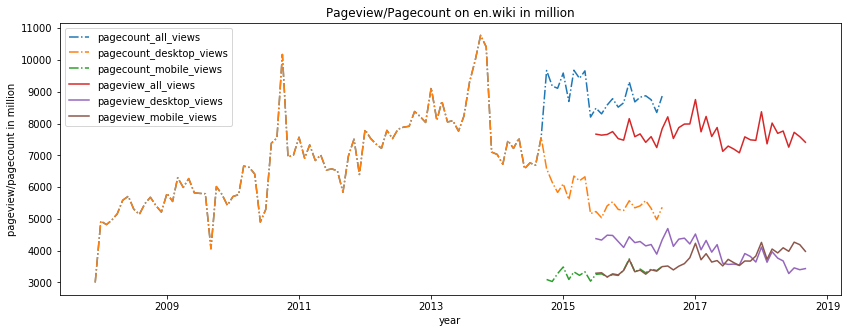

In [99]:
# plot combined data and divide the pageview/pagecount by 1,000,000 for graphing and save to png file
plt.figure(figsize=(14,5))
plt.plot(pd.to_datetime(combined_to_graph[['year','month','day']]),combined_to_graph['pagecount_all_views']/1000000,
         linestyle = '-.', label = "pagecount_all_views")
plt.plot(pd.to_datetime(combined_to_graph[['year','month','day']]),combined_to_graph['pagecount_desktop_views']/1000000,
         linestyle = '-.', label = "pagecount_desktop_views")
plt.plot(pd.to_datetime(combined_to_graph[['year','month','day']]),combined_to_graph['pagecount_mobile_views']/1000000,
         linestyle = '-.', label = "pagecount_mobile_views")
plt.plot(pd.to_datetime(combined_to_graph[['year','month','day']]),combined_to_graph['pageview_all_views']/1000000,
         linestyle = '-', label = "pageview_all_views")
plt.plot(pd.to_datetime(combined_to_graph[['year','month','day']]),combined_to_graph['pageview_desktop_views']/1000000,
         linestyle = '-', label = "pageview_desktop_views")
plt.plot(pd.to_datetime(combined_to_graph[['year','month','day']]),combined_to_graph['pageview_mobile_views']/1000000,
         linestyle = '-', label = "pageview_mobile_views")
plt.xlabel('year')
plt.ylabel('pageview/pagecount in million')
plt.title('Pageview/Pagecount on en.wiki in million')
plt.legend()
plt.savefig('pageview_on_en_wiki_in_million.png')
plt.show()